In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


%matplotlib inline

In [11]:
import kagglehub

path = kagglehub.dataset_download("ayusha232/fuelconsumptioncsv")
print(path)

100%|██████████| 12.7k/12.7k [00:00<00:00, 3.57MB/s]

Extracting files...
C:\Users\Behbab\.cache\kagglehub\datasets\ayusha232\fuelconsumptioncsv\versions\1


In [13]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [19]:
df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "FUELCONSUMPTION_COMB_MPG", "CO2EMISSIONS"]].corr()["CO2EMISSIONS"]

ENGINESIZE                  0.874154
CYLINDERS                   0.849685
FUELCONSUMPTION_CITY        0.898039
FUELCONSUMPTION_HWY         0.861748
FUELCONSUMPTION_COMB        0.892129
FUELCONSUMPTION_COMB_MPG   -0.906394
CO2EMISSIONS                1.000000
Name: CO2EMISSIONS, dtype: float64

In [22]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [49]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB',"FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", 'CO2EMISSIONS']]
y = cdf["CO2EMISSIONS"]
x = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB',"FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY"]]
cdf.head(4)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,4,8.5,9.9,6.7,196
1,2.4,4,9.6,11.2,7.7,221
2,1.5,4,5.9,6.0,5.8,136
3,3.5,6,11.1,12.7,9.1,255


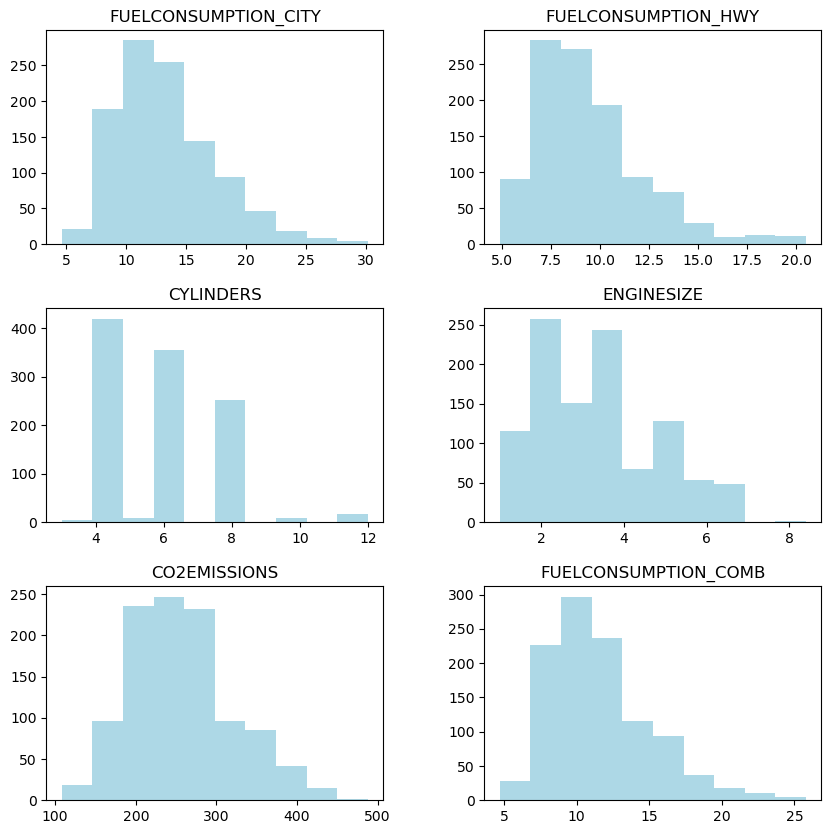

In [44]:
viz = cdf[["FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", 'CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist(figsize=(10, 10), grid=False, color="lightblue")
plt.show()

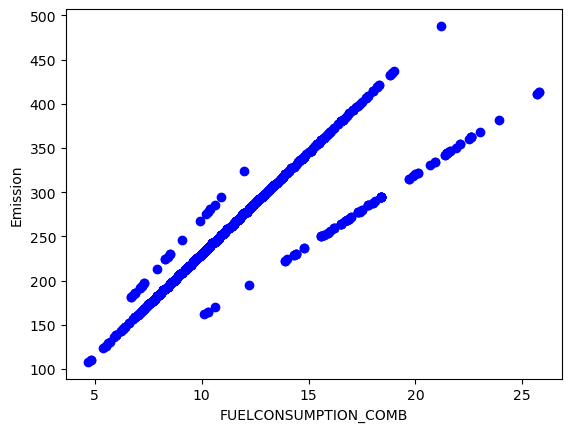

In [47]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

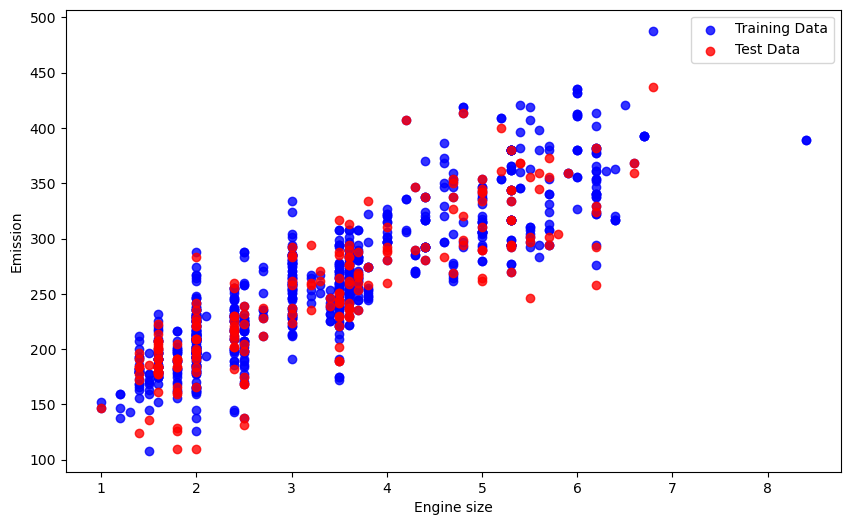

In [70]:
plt.figure(figsize=(10,6))
plt.scatter(x_train.ENGINESIZE, y_train,  color='blue', label="Training Data", alpha=0.8)
plt.scatter(x_test.ENGINESIZE, y_test,  color='red',label="Test Data", alpha=0.8)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.legend()
plt.show()

In [82]:
regr = LinearRegression()
regr.fit(x_train[["ENGINESIZE"]], y_train)

LinearRegression()

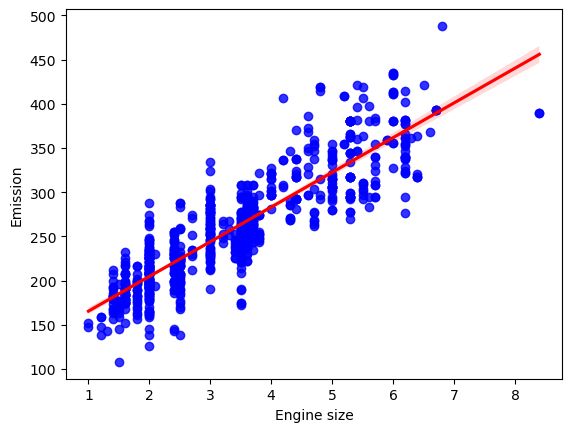

In [94]:
sns.regplot(x=x_train[["ENGINESIZE"]], y=y_train,  color='blue', line_kws=dict(color="r"))
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [105]:
y_hat = regr.predict(x_test[["ENGINESIZE"]])

print("R2:", r2_score(y_test, y_hat), 
      "\nMSE:", mean_squared_error(y_test, y_hat), 
      "\nMAE", mean_absolute_error(y_test, y_hat))

R2: 0.7201153918073576 
MSE: 1181.528809303555 
MAE 25.568890456023556
